### exercise 2 classification 
### comparison of classifiers 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

np.set_printoptions(precision=4) #print numpy arrays with precision 4

In [2]:
df = pd.read_csv('./datasets/Weekly.csv')
#df = pd.read_csv('./datasets/Weekly.csv', index_col=0)
print('Weekly dataframe shape =', df.shape)
df.head()

Weekly dataframe shape = (1089, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
correlations = df.corr(method='pearson')
print(correlations)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000  


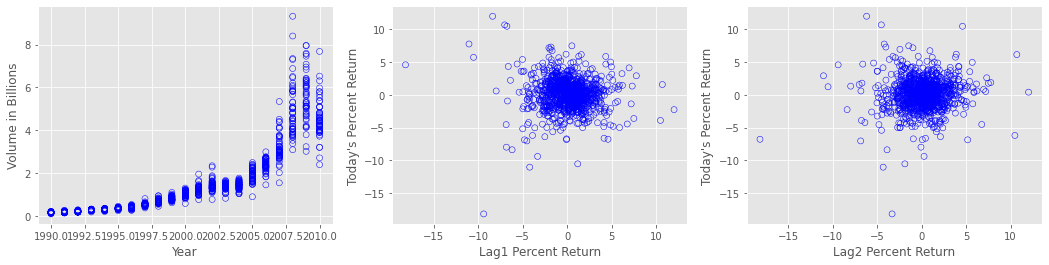

In [4]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4));

#plot years vs volumes
ax1.scatter(df.Year.values,df.Volume.values, facecolors='none', edgecolors='b');
ax1.set_xlabel('Year');
ax1.set_ylabel('Volume in Billions');

# Plot Lag1 vs Today's return
ax2.scatter(df.Lag1.values, df.Today.values, facecolors='none', edgecolors='b' );
ax2.set_xlabel('Lag1 Percent Return');
ax2.set_ylabel('Today\'s Percent Return');

# Plot Lag1 vs Today's return
ax3.scatter(df.Lag2.values, df.Today.values, facecolors='none', edgecolors='b' );
ax3.set_xlabel('Lag2 Percent Return');
ax3.set_ylabel('Today\'s Percent Return');

In [5]:
X = sm.add_constant(df[df.columns[1:7]])
y = np.array([1 if direction=='Up' else 0 for direction in df.Direction.values])

logit = sm.Logit(y,X)
results=logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 20 Jun 2022   Pseudo R-squ.:                0.006580
Time:                        21:30:27   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

In [6]:
y_predicted = results.predict(X)
y_predicted= np.array(y_predicted > 0.5, dtype=float) # whether y_predicted > 0.5 

table = np.histogram2d(y_predicted, y, bins=2)[0] # without [0] it will show bin 
print(table)

print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table)) # number of wrong predictions divided by all predictions

[[ 54.  48.]
 [430. 557.]]
CONFUSION MATRIX
       Down     Up
Down   54.0   48.0
Up    430.0  557.0


Error Rate = 0.43893480257116624


In [7]:
X_train = sm.add_constant(df[df.Year <= 2008].Lag2)
response_train = df[df.Year <= 2008].Direction
y_train = np.array([1 if el=='Up' else 0 for el in response_train])

X_test = sm.add_constant(df[df.Year > 2008].Lag2)
response_test = df[df.Year > 2008].Direction
y_test = np.array([1 if el=='Up' else 0 for el in response_test])

logit = sm.Logit(y_train, X_train)
results = logit.fit()
print(results.summary())
print('\n')

y_predicted = results.predict(X_test)
y_predicted= np.array(y_predicted > 0.5, dtype=float)

table = np.histogram2d(y_predicted, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Jun 2022   Pseudo R-squ.:                0.003076
Time:                        21:30:27   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [8]:
clf = LDA(solver='lsqr', store_covariance=True)
X_train = df[df.Year <= 2008].Lag2.values
X_train = X_train.reshape((len(X_train),1))

X_test = df[df.Year > 2008].Lag2.values
X_test = X_test.reshape((len(X_test),1))

clf.fit(X_train, y_train)
print('Priors = ', clf.priors_ )
print('Class Means = ', clf.means_[0], clf.means_[1])
print('Variance = ', clf.covariance_)
print('\n')

y_predicted = clf.predict(X_test)
y_predicted= np.array(y_predicted > 0.5, dtype=float)

table = np.histogram2d(y_predicted, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Priors =  [0.4477 0.5523]
Class Means =  [-0.0357] [0.2604]
Variance =  [[5.1218]]


CONFUSION MATRIX
      Down    Up
Down   9.0   5.0
Up    34.0  56.0


Error Rate = 0.375


In [9]:
qclf = QDA(store_covariance=True)
qclf.fit(X_train,y_train)

print('Priors = ', qclf.priors_ )
print('Class Means = ', qclf.means_[0], qclf.means_[1])
print('Covariances = ', qclf.covariance_)
print('\n')

y_predict = qclf.predict(X_test)
y_predicted= np.array(y_predict > 0.5, dtype=float)

table = np.histogram2d(y_predict, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Priors =  [0.4477 0.5523]
Class Means =  [-0.0357] [0.2604]
Covariances =  [array([[4.8378]]), array([[5.3707]])]


CONFUSION MATRIX
      Down    Up
Down   0.0   0.0
Up    43.0  61.0


Error Rate = 0.41346153846153844


In [10]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

table = np.histogram2d(y_predicted, y_test , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

      Down    Up
Down  22.0  30.0
Up    21.0  31.0

Error Rate = 0.4903846153846154


In [11]:
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

table = np.histogram2d(y_predicted, y_test , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

      Down    Up
Down  23.0  22.0
Up    20.0  39.0

Error Rate = 0.40384615384615385


In [12]:
predictors = df.columns[1:4]
X_train = sm.add_constant(df[df.Year <= 2008][predictors])
response_train = df[df.Year <= 2008].Direction
y_train = np.array([1 if el=='Up' else 0 for el in response_train])

X_test = sm.add_constant(df[df.Year > 2008][predictors])
response_test = df[df.Year > 2008].Direction
y_test = np.array([1 if el=='Up' else 0 for el in response_test])

logit = sm.Logit(y_train, X_train)
results = logit.fit()
print(results.summary())
print('\n')

y_predicted = results.predict(X_test)
y_predicted= np.array(y_predicted > 0.5, dtype=float)

table = np.histogram2d(y_predicted, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Optimization terminated successfully.
         Current function value: 0.683687
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Mon, 20 Jun 2022   Pseudo R-squ.:                0.005792
Time:                        21:30:27   Log-Likelihood:                -673.43
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04928
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2123      0.065      3.282      0.001       0.086       0.339
Lag1          -0.0537      0.

In [13]:
df['Lag1xLag2'] = pd.Series(df.Lag1*df.Lag2, index=df.index)
predictors = ['Lag1', 'Lag2', 'Lag1xLag2']

X_train = sm.add_constant(df[df.Year <= 2008][predictors])
response_train = df[df.Year <= 2008].Direction
y_train = np.array([1 if el=='Up' else 0 for el in response_train])

X_test = sm.add_constant(df[df.Year > 2008][predictors])
response_test = df[df.Year > 2008].Direction
y_test = np.array([1 if el=='Up' else 0 for el in response_test])

logit = sm.Logit(y_train, X_train)
results = logit.fit()
print(results.summary())
print('\n')

y_predicted = results.predict(X_test)
y_predicted= np.array(y_predicted > 0.5, dtype=float)

table = np.histogram2d(y_predicted, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Optimization terminated successfully.
         Current function value: 0.683701
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Mon, 20 Jun 2022   Pseudo R-squ.:                0.005772
Time:                        21:30:28   Log-Likelihood:                -673.45
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04990
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2114      0.065      3.273      0.001       0.085       0.338
Lag1          -0.0515      0.